# SWMT controls

In [30]:
import intake
import glob

import cartopy.crs as ccrs
import cf_xarray as cfxr
import cmocean as cm
import dask.distributed
import gsw
import matplotlib.pyplot as plt
from matplotlib import gridspec 
import matplotlib.colors as mcolors
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import pdb
import os
import pathlib
import shutil

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [2]:
#Starting a dask client
from os import environ
environ["PYTHONWARNINGS"] = "ignore"

from dask.distributed import Client
client = Client(threads_per_worker = 1)

## Creating the map files

In [ ]:
# Importing the saved files
salt_files_C = np.sort(glob.glob('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_ACCESS_SWMT_shelf_rho0/binned_salt_trans_access_C_*'))
heat_files_C = np.sort(glob.glob('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_ACCESS_SWMT_shelf_rho0/binned_heat_trans_access_C_*'))

In [ ]:
salt_tr_C = xr.open_mfdataset(salt_files_C, concat_dim='time', combine='nested', chunks={'time': 1, 'yt_ocean': 100, 'xt_ocean': 100})
heat_tr_C = xr.open_mfdataset(heat_files_C, concat_dim='time', combine='nested', chunks={'time': 1, 'yt_ocean': 100, 'xt_ocean': 100})
salt_tr_C = salt_tr_C.to_array().squeeze()
heat_tr_C = heat_tr_C.to_array().squeeze()

In [ ]:
net_tr_C = salt_tr_C + heat_tr_C

In [ ]:
depth = xr.open_dataset('/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091_21mbath/output040/ocean/ocean_grid.nc')['ht']

In [7]:
swmt_shelf_sum_ave_C = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_ACCESS_SWMT_shelf_rho0/plots/swmt_shelf_sum_ave_C_access_rho0.nc')

In [11]:
transformation_density = 27.67
shelf_subduction_plot_C = net_tr_C.sel(isopycnal_bins = transformation_density, method = 'nearest') * 1e5
swmt_xt_C = depth.cf['X']
swmt_yt_C = depth.cf['Y']

In [12]:
shelf_subduction_plot_C.astype('float32').compute()

<xarray.DataArray (time: 10, yt_ocean: 510, xt_ocean: 3600)> Size: 73MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
    isopycnal_bins  float64 8B 27.67
  * xt_ocean        (xt_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.85 79.95
  * yt_ocean        (yt_ocean) float64 4kB -81.11 -81.07 ... -59.08 -59.03
    st_ocean        float64 8B 0.5413
Dimensions without coordinates: time

In [13]:
shelf_subduction_plot_C_map = shelf_subduction_plot_C.mean(dim='time')

In [14]:
shelf_subduction_plot_C_map.to_netcdf('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_ACCESS_SWMT_shelf_rho0/plots/swmt_shelf_map_rho0_C_prescribed_access.nc')

## SWMT profile

In [3]:
# Pan01
swmt_prof_1 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/swmt_shelf_sum_ave_rho0_C_pan01.nc')
heat_prof_1 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/heat_shelf_sum_ave_rho0_C_pan01.nc')
salt_prof_1 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/salt_shelf_sum_ave_rho0_C_pan01.nc')

# Pan005
swmt_prof_2 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan005_SWMT_shelf_rho0/plots/swmt_shelf_sum_ave_C_pan005.nc')
heat_prof_2 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/heat_shelf_sum_ave_rho0_C_pan005.nc')
salt_prof_2 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan005_SWMT_shelf_rho0/plots/salt_shelf_sum_ave_rho0_C_pan005.nc')

# ACCESS
swmt_prof_3 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_ACCESS_SWMT_shelf_rho0/plots/swmt_shelf_sum_ave_C_access_rho0.nc')
heat_prof_3 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/heat_shelf_sum_ave_rho0_C_prescribed_access.nc')
salt_prof_3 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/salt_shelf_sum_ave_rho0_C_prescribed_access.nc')

In [4]:
# Maps
subduction_plot_pan01 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/swmt_shelf_map_rho0_C_pan01.nc')
subduction_plot_pan005 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan005_SWMT_shelf_rho0/plots/swmt_shelf_map_rho0_C_pan005.nc')
subduction_plot_acc = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_ACCESS_SWMT_shelf_rho0/plots/swmt_shelf_map_rho0_C_prescribed_access.nc')

In [5]:
# Age
age_1 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/bottom_age_map_control_Pan01.nc')
age_2 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/bottom_age_map_control_Pan005.nc') 
age_3 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/bottom_age_map_control_access.nc')

In [6]:
# Shelf mask

def shelf_mask_isobath(var, model_dict):

    paths = {
             "mom5": "/g/data/ik11/grids/Antarctic_slope_contour_1000m.npz",
             "mom6_01": "/g/data/ik11/grids/Antarctic_slope_contour_1000m_MOM6_01deg.nc",
            "mom6_005": "/g/data/ik11/grids/Antarctic_slope_contour_1000m_MOM6_005deg.nc"
             }

    var = var.cf.sel({'latitude': slice(-90, -59)})

    if paths[model_dict][-3:] == '.nc':
        shelf_mask = xr.open_dataset(paths[model_dict])['contour_masked_above']
    else:
        contour_file = np.load(paths[model_dict])
        shelf_mask = xr.DataArray(contour_file['contour_masked_above'],
                                  coords = var.coords, 
                                  dims = var.dims,
                                  name = 'contour_masked_above')
    
    shelf_mask = xr.where(shelf_mask == 0, 1, 0)
    masked_var = var * shelf_mask
    
    return masked_var, shelf_mask

In [7]:
# Land and contour data
depth_1 = xr.open_dataset('/g/data/ol01/outputs/mom6-panan/panant-01-zstar-ACCESSyr2/output050/20050501.ocean_static.nc')['deptho']
land_mask_1 = (0 * depth_1).fillna(1)
land_1 = xr.where(np.isnan(depth_1.rename('land_1')), 1, np.nan)

depth_2 = xr.open_dataset('/g/data/ol01/outputs/mom6-panan/panant-005-zstar-ACCESSyr2/output030/19930701.ocean_static.nc')['deptho']
land_mask_2 = (0 * depth_2).fillna(1)
land_2 = xr.where(np.isnan(depth_2.rename('land_2')), 1, np.nan)

depth_3 = xr.open_dataset('/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091_21mbath/output012/ocean/ocean_grid.nc')['ht']
land_mask_3 = (0 * depth_3).fillna(1)
land_3 = xr.where(np.isnan(depth_3.rename('land_3')), 1, np.nan)

shelf_contour_1, shelf_mask_1 = shelf_mask_isobath(depth_1, 'mom6_01')
shelf_contour_2, shelf_mask_2 = shelf_mask_isobath(depth_2, 'mom6_005')
shelf_contour_3, shelf_mask_3 = shelf_mask_isobath(depth_3, 'mom5')

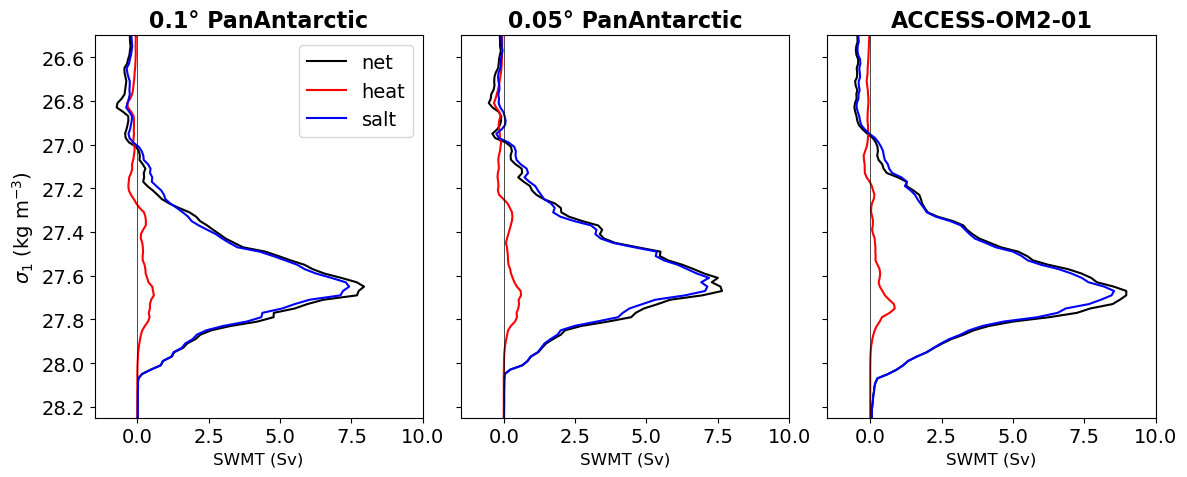

In [58]:
plt.rcParams['font.size'] = 14

profiles = {
    "0.1° PanAntarctic": (swmt_prof_1, heat_prof_1, salt_prof_1),
    "0.05° PanAntarctic": (swmt_prof_2, heat_prof_2, salt_prof_2),
    "ACCESS-OM2-01": (swmt_prof_3, heat_prof_3, salt_prof_3),
}

# --- Figure setup ---
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True)

for ax, (title, (swmt, heat, salt)) in zip(axes, profiles.items()):
    ax.plot(swmt, swmt['isopycnal_bins'], color='k', label='net')
    ax.plot(heat, heat['isopycnal_bins'], color='r', label='heat')
    ax.plot(salt, salt['isopycnal_bins'], color='b', label='salt')
    ax.plot([0, 0], [28.25, 26.5], 'k', linewidth=0.5)

    ax.set_ylim(28.25, 26.5)
    ax.set_xlim(-1.5, 10)
    ax.set_title(title, fontsize=16,fontweight='bold')
    ax.set_xlabel('SWMT (Sv)', fontsize=12)

# Shared y-label
axes[0].set_ylabel(r'$\sigma_1$ (kg m$^{-3}$)', fontsize=14)

# Put legend only on first panel
axes[0].legend(loc=1, fontsize=14)

plt.tight_layout()
plt.show()

fig.savefig("/g/data/g40/kc5856/thesis_figures/validation_swmt_profiles.png", dpi=300, bbox_inches='tight')

In [9]:
def standardize_coords(da):
    if "xh" in da.dims and "yh" in da.dims:
        return da.rename({"xh": "lon", "yh": "lat"})
    elif "xt_ocean" in da.dims and "yt_ocean" in da.dims:
        return da.rename({"xt_ocean": "lon", "yt_ocean": "lat"})
    return da


In [10]:
subduction_plot_pan01_shelf = subduction_plot_pan01.where(shelf_mask_1 ==1)
subduction_plot_pan005_shelf = subduction_plot_pan005.where(shelf_mask_2 ==1)
subduction_plot_acc_shelf = subduction_plot_acc.where(shelf_mask_3 ==1)

In [11]:
subduction_plot_pan01_shelf = subduction_plot_pan01_shelf.load()
subduction_plot_pan005_shelf = subduction_plot_pan005_shelf.load()
subduction_plot_acc_shelf = subduction_plot_acc_shelf.load()

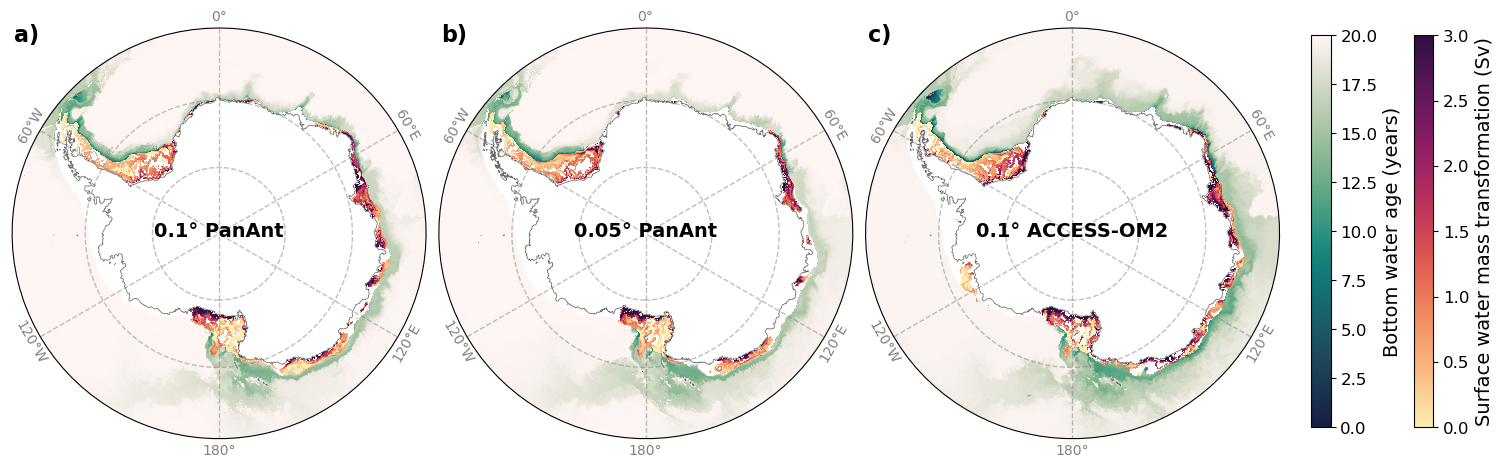

In [40]:
plt.rcParams['font.size'] = 16

# Projection
projection = ccrs.SouthPolarStereo()

# Figure with 2 subplots side by side
fig, axes = plt.subplots(
    nrows=1, ncols=3,
    subplot_kw={"projection": projection},
    figsize=(12.8, 5.6),
    constrained_layout=True
)

# Shared circle boundary
theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.495], 0.495
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

# Datasets, land masks, shelf masks, and titles
land_masks = [land_1, land_2, land_3]
land_contours = [land_mask_1, land_mask_2, land_mask_3]
shelf_masks = [shelf_mask_1, shelf_mask_2, shelf_mask_3]
titles = ["0.1° PanAnt", "0.05° PanAnt", "0.1° ACCESS-OM2"]

# Normalised coordinates
age_datasets = [standardize_coords(age_1), 
                standardize_coords(age_2), 
                standardize_coords(age_3)]
swmt_datasets = [standardize_coords(subduction_plot_pan01_shelf), 
                standardize_coords(subduction_plot_pan005_shelf), 
                standardize_coords(subduction_plot_acc_shelf)]

# Longitude label settings for rotation
label_lon = ['0°', '180°', '60°E', '120°W', '120°E', '60°W']
rot_lon = [0, 0, -60, -60, 60, 60]
lat_lon_label = [-58, -58, -58, -58, -58, -58]

# Loop over subplots
for i, (ax, age_data, swmt_data, land_m, land_contour, shelf_m, title) in enumerate(zip(
        axes, age_datasets, swmt_datasets, land_masks, land_contours, shelf_masks, titles)):

    ax.set_extent([-280, 80, -80, -59], crs=ccrs.PlateCarree())
    ax.set_boundary(circle, transform=ax.transAxes)

    # Filled land
    land_m.plot.contourf(ax=ax, colors='white',
                         zorder=2, transform=ccrs.PlateCarree(),
                         add_colorbar=False)

    # Coast line
    ax.contour(land_contour.cf['X'], land_contour.cf['Y'], land_contour,
               levels=[0, 1], colors='dimgrey', linewidths=0.5,
               transform=ccrs.PlateCarree())

    # Gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                      linewidth=1, xlocs=range(-180, 171, 60), ylocs=[],
                      color='gray', alpha=0.5, linestyle='--', zorder=10)
    gl2 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                       linewidth=1, xlocs=[], ylocs=(-80, -70, -55),
                       color='gray', alpha=0.5, linestyle='--', zorder=10)

    # Manually rotate longitude labels
    for j, position in enumerate([0, 180, 60, -120, 120, -60]):
        ax.text(position, lat_lon_label[j], label_lon[j], rotation=rot_lon[j],
                ha='center', va='center', color='gray', fontsize=10,
                transform=ccrs.PlateCarree())

    # Plot dataset
    im_age = age_data.plot(
        x="lon", y="lat",
        transform=ccrs.PlateCarree(),
        vmin=0, vmax=20,
        extend="both",
        cmap=cm.cm.tempo.reversed(),
        add_colorbar=False,
        ax=ax,
    )

    # Shelf as filled white region
    ax.pcolormesh(
        shelf_m.cf["X"], shelf_m.cf["Y"],
        shelf_m.values,   # just the raw array
        cmap=mcolors.ListedColormap(["none", "white"]),
        vmin=0, vmax=1,
        transform=ccrs.PlateCarree(),
        #zorder=3
    )
    
    im_swmt = swmt_data.plot(
        x="lon", y="lat",
        transform=ccrs.PlateCarree(),
        vmin=0, vmax=3,
        extend="both",
        cmap=cm.cm.matter,
        add_colorbar=False,
        ax=ax,
    )

    # Set title
    ax.set_title("", fontsize=14, pad=25)
    ax.text(
        0.5, 0.5,
        title,
        transform=ax.transAxes,
        fontsize=14,
        weight="bold",
        ha="center", va="center",
    )

    # Add subplot label (a), (b), (c).
    ax.text(0.01,1, f'{chr(97+i)})', transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='left', color='black')

# Add shared colorbars below all subplots
cbar_ax1 = fig.add_axes([1.02, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
cbar_ax2 = fig.add_axes([1.1, 0.15, 0.015, 0.7])

# Create the colorbars
cbar1 = fig.colorbar(im_age, cax=cbar_ax1, orientation='vertical')
cbar1.set_label("Bottom water age (years)", fontsize=14)  # set label fontsize
cbar1.ax.tick_params(labelsize=12)                        # set tick fontsize

cbar2 = fig.colorbar(im_swmt, cax=cbar_ax2, orientation='vertical')
cbar2.set_label("Surface water mass transformation (Sv)", fontsize=14)
cbar2.ax.tick_params(labelsize=12)

plt.show()

fig.savefig("/g/data/g40/kc5856/thesis_figures/validation_swmt_maps.png", dpi=300, bbox_inches='tight')

# Combined

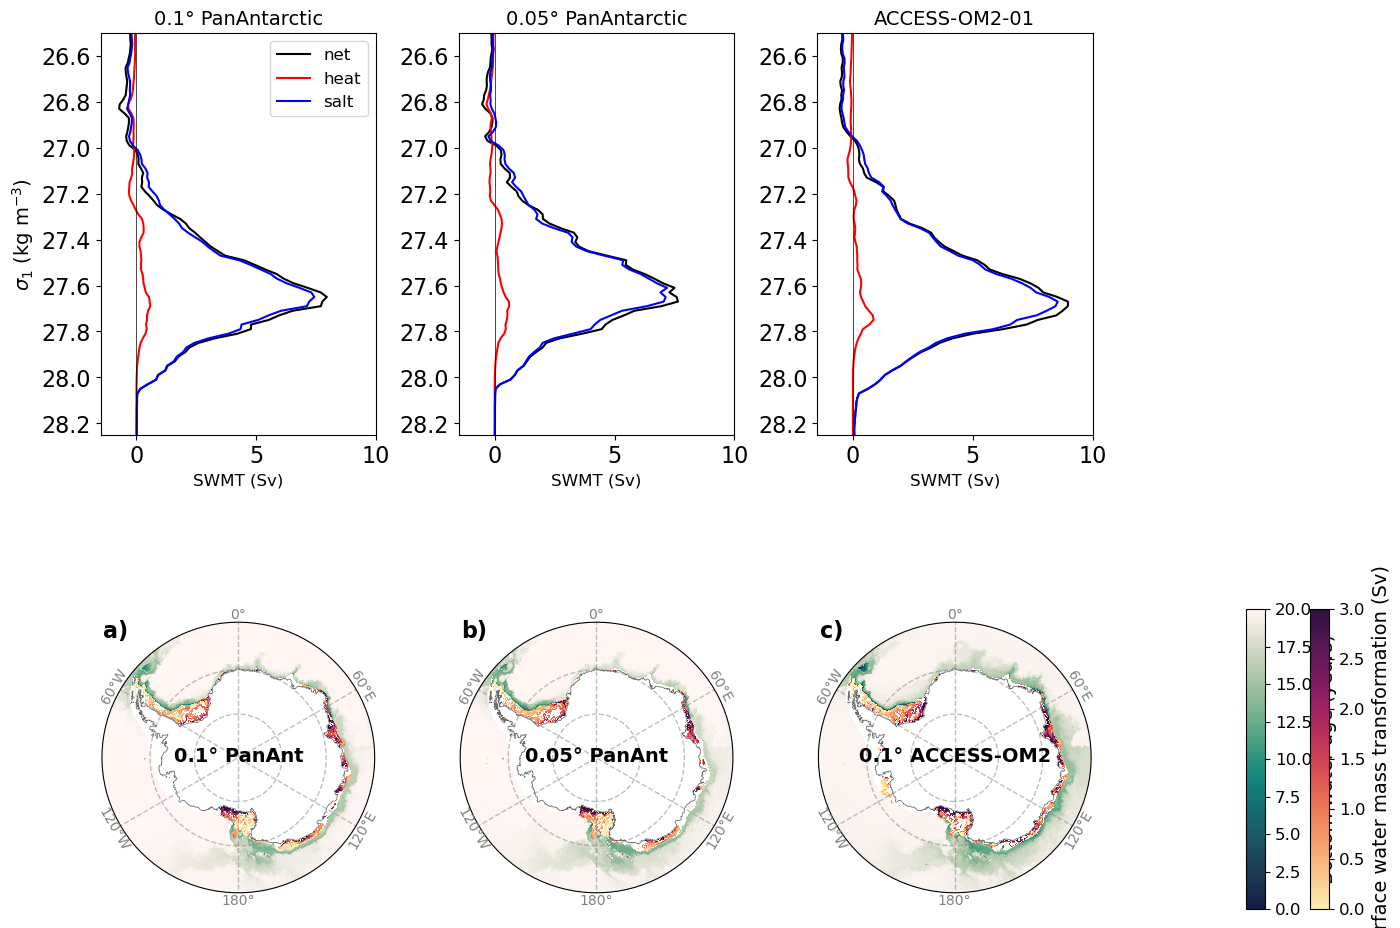

In [47]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import cmocean as cm
import cartopy.crs as ccrs

plt.rcParams['font.size'] = 16

# --- Data sets for top row ---
profiles = {
    "0.1° PanAntarctic": (swmt_prof_1, heat_prof_1, salt_prof_1),
    "0.05° PanAntarctic": (swmt_prof_2, heat_prof_2, salt_prof_2),
    "ACCESS-OM2-01": (swmt_prof_3, heat_prof_3, salt_prof_3),
}

# --- Combined figure ---
fig = plt.figure(figsize=(12.8, 12))  # taller figure for 2 rows
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1], hspace=0.3, wspace=0.3)

# --- Top row: profiles ---
axes_top = [fig.add_subplot(gs[0, i]) for i in range(3)]

for ax, (title, (swmt, heat, salt)) in zip(axes_top, profiles.items()):
    ax.plot(swmt, swmt['isopycnal_bins'], color='k', label='net')
    ax.plot(heat, heat['isopycnal_bins'], color='r', label='heat')
    ax.plot(salt, salt['isopycnal_bins'], color='b', label='salt')
    ax.plot([0, 0], [28.25, 26.5], 'k', linewidth=0.5)
    ax.set_ylim(28.25, 26.5)
    ax.set_xlim(-1.5, 10)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('SWMT (Sv)', fontsize=12)

axes_top[0].set_ylabel(r'$\sigma_1$ (kg m$^{-3}$)', fontsize=14)
axes_top[0].legend(loc=1, fontsize=12)

# --- Bottom row: maps ---
projection = ccrs.SouthPolarStereo()
axes_bottom = [fig.add_subplot(gs[1, i], projection=projection) for i in range(3)]

# Shared circle boundary
theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.495], 0.495
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

land_masks = [land_1, land_2, land_3]
land_contours = [land_mask_1, land_mask_2, land_mask_3]
shelf_masks = [shelf_mask_1, shelf_mask_2, shelf_mask_3]
titles = ["0.1° PanAnt", "0.05° PanAnt", "0.1° ACCESS-OM2"]

age_datasets = [standardize_coords(age_1), 
                standardize_coords(age_2), 
                standardize_coords(age_3)]
swmt_datasets = [standardize_coords(subduction_plot_pan01_shelf), 
                 standardize_coords(subduction_plot_pan005_shelf), 
                 standardize_coords(subduction_plot_acc_shelf)]

label_lon = ['0°', '180°', '60°E', '120°W', '120°E', '60°W']
rot_lon = [0, 0, -60, -60, 60, 60]
lat_lon_label = [-58, -58, -58, -58, -58, -58]

for i, (ax, age_data, swmt_data, land_m, land_contour, shelf_m, title) in enumerate(
        zip(axes_bottom, age_datasets, swmt_datasets, land_masks, land_contours, shelf_masks, titles)):

    ax.set_extent([-280, 80, -80, -59], crs=ccrs.PlateCarree())
    ax.set_boundary(circle, transform=ax.transAxes)

    land_m.plot.contourf(ax=ax, colors='white', zorder=2, transform=ccrs.PlateCarree(), add_colorbar=False)
    ax.contour(land_contour.cf['X'], land_contour.cf['Y'], land_contour,
               levels=[0, 1], colors='dimgrey', linewidths=0.5, transform=ccrs.PlateCarree())

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                      linewidth=1, xlocs=range(-180, 171, 60), ylocs=[],
                      color='gray', alpha=0.5, linestyle='--', zorder=10)
    gl2 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                       linewidth=1, xlocs=[], ylocs=(-80, -70, -55),
                       color='gray', alpha=0.5, linestyle='--', zorder=10)

    for j, position in enumerate([0, 180, 60, -120, 120, -60]):
        ax.text(position, lat_lon_label[j], label_lon[j], rotation=rot_lon[j],
                ha='center', va='center', color='gray', fontsize=10,
                transform=ccrs.PlateCarree())

    im_age = age_data.plot(x="lon", y="lat", transform=ccrs.PlateCarree(),
                           vmin=0, vmax=20, extend="both",
                           cmap=cm.cm.tempo.reversed(),
                           add_colorbar=False, ax=ax)

    ax.pcolormesh(shelf_m.cf["X"], shelf_m.cf["Y"], shelf_m.values,
                  cmap=mcolors.ListedColormap(["none", "white"]),
                  vmin=0, vmax=1, transform=ccrs.PlateCarree())

    im_swmt = swmt_data.plot(x="lon", y="lat", transform=ccrs.PlateCarree(),
                             vmin=0, vmax=3, extend="both",
                             cmap=cm.cm.matter, add_colorbar=False, ax=ax)

    ax.set_title("", fontsize=14, pad=25)
    ax.text(0.5, 0.5, title, transform=ax.transAxes, fontsize=14, weight="bold",
            ha="center", va="center")

    ax.text(0.01,1, f'{chr(97+i)})', transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='left', color='black')

# Shared colorbars on right side of figure
cbar_ax1 = fig.add_axes([1.02, 0.15, 0.015, 0.25])
cbar_ax2 = fig.add_axes([1.07, 0.15, 0.015, 0.25])

cbar1 = fig.colorbar(im_age, cax=cbar_ax1, orientation='vertical')
cbar1.set_label("Bottom water age (years)", fontsize=14)
cbar1.ax.tick_params(labelsize=12)

cbar2 = fig.colorbar(im_swmt, cax=cbar_ax2, orientation='vertical')
cbar2.set_label("Surface water mass transformation (Sv)", fontsize=14)
cbar2.ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

fig.savefig("/g/data/g40/kc5856/thesis_figures/validation_swmt_maps_combined.png",
            dpi=300, bbox_inches='tight')
